## 第 6 章  Ajax 数据爬取
### 6.3 Ajax 结果提取
### 6.4 分析 Ajax 爬取今日头条街拍美图

In [1]:
import requests

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.162 Safari/537.36"}
url = 'https://m.weibo.cn/u/2830678474'
html = requests.get(url, headers=headers).text
print(html)

<!DOCTYPE html>
<html lang="zh-cn">
<head>
    <meta charset="utf-8">
    <link rel="dns-prefetch" href="//h5.sinaimg.cn">
    <meta name="viewport" content="width=device-width,initial-scale=1,user-scalable=no,viewport-fit=cover">
    <meta name="format-detection" content="telephone=no">
    <link rel="shortcut icon" type="image/x-icon" href="/favicon.ico">
    <title>微博</title>
    <meta content="随时随地发现新鲜事！微博带你欣赏世界上每一个精彩瞬间，了解每一个幕后故事。分享你想表达的，让全世界都能听到你的心声！" name="description">
        <link rel="stylesheet" href="//h5.sinaimg.cn/marvel/v1.4.5/css/lib/base.css">
    <link rel="stylesheet" href="//h5.sinaimg.cn/marvel/v1.4.5/css/card/cards.css">
        <link rel="manifest" href="/manifest.json">
    <script>!function(e){var a,i=navigator.userAgent.toLowerCase(),n=document.documentElement,t=parseInt(n.clientWidth);if(/(iPhone|iPad|iPod|iOS)/i.test(navigator.userAgent)||i.indexOf("like mac os x")>0){var s=/os [\d._]*/gi,o=i.match(s);a=(o+"").replace(/[^0-9|_.]/gi,"").replace(/_/gi,".")}var

### 6.3 Ajax 结果提取
**1. 分析请求**

分析请求可以发现，这是一个 GET 类型的请求，请求链接为 https://m.weibo.cn/api/container/getIndex?type=uid&value=2830678474&containerid=1076032830678474&since_id=4761790393616176 。请求的参数有 4 个：type、value、containerid 和 since_id。

随后再看看其它请求，可以发现，它们的 type、value 和 containerid 始终如一。type 始终为 uid，value 的值就是用户的 id。containerid 就是 107603 加上用户的 id。since_id 暂时没有发现特别明显的规律。

**2. 分析响应**

切换到 Preview（即 Response preview）选项卡，可以看到返回数据是 JSON 格式的，展开其内容可以看到，最关键的两部分信息就是 cardlistInfo 和 cards：前者包含两个比较重要的信息，一个是 total，观察后可以发现，它其实是微博的总数量，我们可以根据这个数字来估算分页数（从微博顶部滑到底部，只有18个关于具体微博内容的Ajax请求，前17个每个Ajax请求返回10条微博数据），另一个是 since_id ，它是下一个 Ajax 请求（返回更早期发布的微博）的 since_id；后者则是一个列表，它包含 10 个元素，展开其中一个看一下，可以发现，这个元素有一个比较重要的字段 mblog。展开它，可以发现它包含的正是微博的一些信息，比如 attitudes_count（赞数目）、comments_count（评论数目）、reposts_count（转发数目）、created_at（发布时间）、text（微博正文）等，而且它们都是一些格式化的内容。

这样我们请求一个接口，就可以得到 10 条微博，而且请求时只需要改变 since_id 参数即可。  
这样的话，我们只需要简单做一个循环，就可以获取所有微博了。  

**3. 实战演练**

In [1]:
import requests

base_url = "https://m.weibo.cn/api/container/getIndex?type=uid&value=2830678474&containerid=1076032830678474"

headers = {
    'Referer': 'https://m.weibo.cn/u/2830678474',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
}

response = requests.get(base_url, headers=headers)
if response.status_code == 200:
    print(response.json())

{'ok': 1, 'data': {'cardlistInfo': {'containerid': '1076032830678474', 'v_p': 42, 'show_style': 1, 'total': 198, 'since_id': 4774091682746723}, 'cards': [{'card_type': 9, 'profile_type_id': 'proweibo_4787545654952441', 'itemid': '1076032830678474_-_4787545654952441', 'scheme': 'https://m.weibo.cn/status/LAJsFkMm5?mblogid=LAJsFkMm5&luicode=10000011&lfid=1076032830678474', 'mblog': {'visible': {'type': 0, 'list_id': 0}, 'created_at': 'Mon Jul 04 16:28:14 +0800 2022', 'id': '4787545654952441', 'mid': '4787545654952441', 'can_edit': False, 'show_additional_indication': 0, 'text': '转发微博', 'source': 'iPhone 12 Pro Max', 'favorited': False, 'pic_ids': [], 'is_paid': False, 'mblog_vip_type': 0, 'user': {'id': 2830678474, 'screen_name': '崔庆才丨静觅', 'profile_image_url': 'https://tva3.sinaimg.cn/crop.0.0.458.458.180/a8b8b9cajw8exsgha3l4uj20cq0crmy5.jpg?KID=imgbed,tva&Expires=1657706023&ssig=4oljAkARMi', 'profile_url': 'https://m.weibo.cn/u/2830678474?uid=2830678474&luicode=10000011&lfid=10760328306

In [2]:
type(response)

requests.models.Response

In [4]:
dir(requests)

['ConnectTimeout',
 'ConnectionError',
 'DependencyWarning',
 'FileModeWarning',
 'HTTPError',
 'JSONDecodeError',
 'NullHandler',
 'PreparedRequest',
 'ReadTimeout',
 'Request',
 'RequestException',
 'RequestsDependencyWarning',
 'Response',
 'Session',
 'Timeout',
 'TooManyRedirects',
 'URLRequired',
 '__author__',
 '__author_email__',
 '__build__',
 '__builtins__',
 '__cached__',
 '__cake__',
 '__copyright__',
 '__description__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__title__',
 '__url__',
 '__version__',
 '_check_cryptography',
 '_internal_utils',
 'adapters',
 'api',
 'auth',
 'certs',
 'chardet_version',
 'charset_normalizer_version',
 'check_compatibility',
 'codes',
 'compat',
 'cookies',
 'delete',
 'exceptions',
 'get',
 'head',
 'hooks',
 'logging',
 'models',
 'options',
 'packages',
 'patch',
 'post',
 'put',
 'request',
 'session',
 'sessions',
 'ssl',
 'status_codes',
 'structures',
 'urllib3',
 

In [6]:
dir(requests.models)

['CONTENT_CHUNK_SIZE',
 'Callable',
 'CaseInsensitiveDict',
 'ChunkedEncodingError',
 'ConnectionError',
 'ContentDecodingError',
 'DEFAULT_REDIRECT_LIMIT',
 'DecodeError',
 'HTTPBasicAuth',
 'HTTPError',
 'ITER_CHUNK_SIZE',
 'InvalidJSONError',
 'InvalidURL',
 'JSONDecodeError',
 'LocationParseError',
 'Mapping',
 'MissingSchema',
 'PreparedRequest',
 'ProtocolError',
 'REDIRECT_STATI',
 'ReadTimeoutError',
 'Request',
 'RequestEncodingMixin',
 'RequestField',
 'RequestHooksMixin',
 'RequestsJSONDecodeError',
 'Response',
 'StreamConsumedError',
 'UnsupportedOperation',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_copy_cookie_jar',
 'basestring',
 'builtin_str',
 'bytes',
 'chardet',
 'check_header_validity',
 'codes',
 'complexjson',
 'cookiejar_from_dict',
 'cookielib',
 'datetime',
 'default_hooks',
 'encode_multipart_formdata',
 'encodings',
 'get_auth_from_url',
 'get_cookie_header',
 'guess_filename',
 'gues

In [7]:
requests.Response == requests.models.Response

True

In [8]:
type(response.json())

dict

In [9]:
issubclass(requests.ConnectionError, Exception)

True

In [10]:
issubclass(requests.ConnectionError, BaseException)

True

In [11]:
dir(requests.ConnectionError)

['__cause__',
 '__class__',
 '__context__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__suppress_context__',
 '__traceback__',
 '__weakref__',
 'args',
 'characters_written',
 'errno',
 'filename',
 'filename2',
 'strerror',
 'winerror',
 'with_traceback']

In [12]:
if response.status_code == 200:
    s = response.json()

In [23]:
print(type(s))

<class 'dict'>


In [24]:
import json

print(json.dumps(s, indent=4))

{
    "ok": 1,
    "data": {
        "cardlistInfo": {
            "containerid": "1076032830678474",
            "v_p": 42,
            "show_style": 1,
            "total": 198,
            "since_id": 4774091682746723
        },
        "cards": [
            {
                "card_type": 9,
                "profile_type_id": "proweibo_4787545654952441",
                "itemid": "1076032830678474_-_4787545654952441",
                "scheme": "https://m.weibo.cn/status/LAJsFkMm5?mblogid=LAJsFkMm5&luicode=10000011&lfid=1076032830678474",
                "mblog": {
                    "visible": {
                        "type": 0,
                        "list_id": 0
                    },
                    "created_at": "Mon Jul 04 16:28:14 +0800 2022",
                    "id": "4787545654952441",
                    "mid": "4787545654952441",
                    "can_edit": false,
                    "show_additional_indication": 0,
                    "text": "\u8f6c\u53d1\u5

In [26]:
print(json.dumps(s, indent=4, ensure_ascii=False))

{
    "ok": 1,
    "data": {
        "cardlistInfo": {
            "containerid": "1076032830678474",
            "v_p": 42,
            "show_style": 1,
            "total": 198,
            "since_id": 4774091682746723
        },
        "cards": [
            {
                "card_type": 9,
                "profile_type_id": "proweibo_4787545654952441",
                "itemid": "1076032830678474_-_4787545654952441",
                "scheme": "https://m.weibo.cn/status/LAJsFkMm5?mblogid=LAJsFkMm5&luicode=10000011&lfid=1076032830678474",
                "mblog": {
                    "visible": {
                        "type": 0,
                        "list_id": 0
                    },
                    "created_at": "Mon Jul 04 16:28:14 +0800 2022",
                    "id": "4787545654952441",
                    "mid": "4787545654952441",
                    "can_edit": false,
                    "show_additional_indication": 0,
                    "text": "转发微博",
        

In [29]:
with open('weibo.json', 'w', encoding='utf-8') as file:
    file.write(json.dumps(s, indent=4, ensure_ascii=False))

In [30]:
with open('weibo.json', 'r', encoding='utf-8') as file:
    print(type(file))
    print('-----------------')
    print(dir(file))

<class '_io.TextIOWrapper'>
-----------------
['_CHUNK_SIZE', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_finalizing', 'buffer', 'close', 'closed', 'detach', 'encoding', 'errors', 'fileno', 'flush', 'isatty', 'line_buffering', 'mode', 'name', 'newlines', 'read', 'readable', 'readline', 'readlines', 'reconfigure', 'seek', 'seekable', 'tell', 'truncate', 'writable', 'write', 'write_through', 'writelines']


In [31]:
items = s.get('data').get('cards')
print(len(items))

10


In [32]:
print(type(items))

<class 'list'>


In [33]:
for item in items:
    print(item)

{'card_type': 9, 'profile_type_id': 'proweibo_4787545654952441', 'itemid': '1076032830678474_-_4787545654952441', 'scheme': 'https://m.weibo.cn/status/LAJsFkMm5?mblogid=LAJsFkMm5&luicode=10000011&lfid=1076032830678474', 'mblog': {'visible': {'type': 0, 'list_id': 0}, 'created_at': 'Mon Jul 04 16:28:14 +0800 2022', 'id': '4787545654952441', 'mid': '4787545654952441', 'can_edit': False, 'show_additional_indication': 0, 'text': '转发微博', 'source': 'iPhone 12 Pro Max', 'favorited': False, 'pic_ids': [], 'is_paid': False, 'mblog_vip_type': 0, 'user': {'id': 2830678474, 'screen_name': '崔庆才丨静觅', 'profile_image_url': 'https://tva3.sinaimg.cn/crop.0.0.458.458.180/a8b8b9cajw8exsgha3l4uj20cq0crmy5.jpg?KID=imgbed,tva&Expires=1657706023&ssig=4oljAkARMi', 'profile_url': 'https://m.weibo.cn/u/2830678474?uid=2830678474&luicode=10000011&lfid=1076032830678474', 'statuses_count': 2507, 'verified': True, 'verified_type': 0, 'verified_type_ext': 0, 'verified_reason': '互联网科技博主', 'close_blue_v': False, 'descri

In [34]:
for item in items:
    item = item.get('mblog')
    print(item)

{'visible': {'type': 0, 'list_id': 0}, 'created_at': 'Mon Jul 04 16:28:14 +0800 2022', 'id': '4787545654952441', 'mid': '4787545654952441', 'can_edit': False, 'show_additional_indication': 0, 'text': '转发微博', 'source': 'iPhone 12 Pro Max', 'favorited': False, 'pic_ids': [], 'is_paid': False, 'mblog_vip_type': 0, 'user': {'id': 2830678474, 'screen_name': '崔庆才丨静觅', 'profile_image_url': 'https://tva3.sinaimg.cn/crop.0.0.458.458.180/a8b8b9cajw8exsgha3l4uj20cq0crmy5.jpg?KID=imgbed,tva&Expires=1657706023&ssig=4oljAkARMi', 'profile_url': 'https://m.weibo.cn/u/2830678474?uid=2830678474&luicode=10000011&lfid=1076032830678474', 'statuses_count': 2507, 'verified': True, 'verified_type': 0, 'verified_type_ext': 0, 'verified_reason': '互联网科技博主', 'close_blue_v': False, 'description': 'cuiqingcai.com', 'gender': 'm', 'mbtype': 12, 'urank': 36, 'mbrank': 7, 'follow_me': False, 'following': False, 'follow_count': 1172, 'followers_count': '1.1万', 'followers_count_str': '1.1万', 'cover_image_phone': 'https:

In [35]:
for item in items:
    item = item.get('mblog')
    weibo = {}
    weibo['id'] = item.get('id')
    weibo['text'] = item.get('text')
    weibo['attitudes'] = item.get('attitudes_count')
    weibo['comments'] = item.get('comments_count')
    weibo['reposts'] = item.get('reposts_count')
    print(weibo)

{'id': '4787545654952441', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 0}
{'id': '4787127352559634', 'text': '转发微博', 'attitudes': 0, 'comments': 0, 'reposts': 0}
{'id': '4779505241821018', 'text': '反人类的电梯设计，但想想也可以理解。<span class="url-icon"><img alt=[二哈] src="https://h5.sinaimg.cn/m/emoticon/icon/others/d_erha-139d0e07bd.png" style="width:1em; height:1em;" /></span> <a  href="https://video.weibo.com/show?fid=1034:4779505139777624" data-hide=""><span class=\'url-icon\'><img style=\'width: 1rem;height: 1rem\' src=\'https://h5.sinaimg.cn/upload/2015/09/25/3/timeline_card_small_video_default.png\'></span><span class="surl-text">崔庆才丨静觅的微博视频</span></a> ', 'attitudes': 0, 'comments': 3, 'reposts': 0}
{'id': '4779479290872945', 'text': '<span class="url-icon"><img alt="[苦涩]" src="https://face.t.sinajs.cn/t4/appstyle/expression/ext/normal/7e/2021_bitter_org.png" style="width:1em; height:1em;" /></span>//<a href=\'/n/梁博penny\'>@梁博penny</a>:<span class="url-icon"><img alt=[泪] src="htt

In [37]:
from pyquery import PyQuery as pq

for item in items:
    item = item.get('mblog')
    weibo = {}
    weibo['id'] = item.get('id')
    weibo['text'] = pq(item.get('text')).text()
    weibo['attitudes'] = item.get('attitudes_count')
    weibo['comments'] = item.get('comments_count')
    weibo['reposts'] = item.get('reposts_count')
    print(weibo)

{'id': '4787545654952441', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 0}
{'id': '4787127352559634', 'text': '转发微博', 'attitudes': 0, 'comments': 0, 'reposts': 0}
{'id': '4779505241821018', 'text': '反人类的电梯设计，但想想也可以理解。 崔庆才丨静觅的微博视频', 'attitudes': 0, 'comments': 3, 'reposts': 0}
{'id': '4779479290872945', 'text': '//@梁博penny://@简木生--撰稿者://@姚广孝_wayne :搜了一下，确实有相应的报道：网页链接', 'attitudes': 4, 'comments': 0, 'reposts': 3}
{'id': '4777608590131929', 'text': '昨天居然忘了看了。', 'attitudes': 0, 'comments': 0, 'reposts': 0}
{'id': '4777496082648163', 'text': '终于可以堂食了，舒服。', 'attitudes': 0, 'comments': 0, 'reposts': 0}
{'id': '4776020123063600', 'text': '', 'attitudes': 1, 'comments': 0, 'reposts': 1}
{'id': '4776019325878568', 'text': '', 'attitudes': 0, 'comments': 0, 'reposts': 1}
{'id': '4774990266238255', 'text': '分享一个非常全的有关系统设计的资源：github.com/donnemartin/system-design-primer，其中介绍了各种各样系统的设计原则，比如可用性和一致性、负载均衡、域名系统、反向代理、数据库、缓存等、消息队列等，对提高整体计算机水平非常有帮助。', 'attitudes': 1, 'comments': 0, 'reposts': 

这里我们借助 pyquery 将正文中的 HTML 标签去掉。

In [41]:
from pyquery import PyQuery as pq
import pymongo


client = pymongo.MongoClient(host='baidu.net', port=27017)
db = client['sina']
collection = db['weibo']


def get_weibo(url):
    response = requests.get(url, headers=headers)
    s = response.json()
    global since_id
    since_id = s.get('data').get('cardlistInfo').get('since_id')
    items = s.get('data').get('cards')
    for item in items:
        item = item.get('mblog')
        weibo = {}
        weibo['id'] = item.get('id')
        weibo['text'] = pq(item.get('text')).text()
        weibo['attitudes'] = item.get('attitudes_count')
        weibo['comments'] = item.get('comments_count')
        weibo['reposts'] = item.get('reposts_count')
        collection.insert_one(weibo)


since_id = 'start'
url = base_url
while since_id:
    get_weibo(url)
    if since_id:
        url = base_url + '&since_id=' + str(since_id)

In [44]:
results = collection.find()
for result in results:
    print(result)

{'_id': ObjectId('62d17b88c0c6baf7a6c3bc9f'), 'id': '4791374329414722', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 0}
{'_id': ObjectId('62d17b88c0c6baf7a6c3bca0'), 'id': '4791373461455656', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 1}
{'_id': ObjectId('62d17b88c0c6baf7a6c3bca1'), 'id': '4787545654952441', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 0}
{'_id': ObjectId('62d17b88c0c6baf7a6c3bca2'), 'id': '4787127352559634', 'text': '转发微博', 'attitudes': 0, 'comments': 0, 'reposts': 0}
{'_id': ObjectId('62d17b88c0c6baf7a6c3bca3'), 'id': '4779505241821018', 'text': '反人类的电梯设计，但想想也可以理解。 崔庆才丨静觅的微博视频', 'attitudes': 0, 'comments': 3, 'reposts': 0}
{'_id': ObjectId('62d17b88c0c6baf7a6c3bca4'), 'id': '4779479290872945', 'text': '//@梁博penny://@简木生--撰稿者://@姚广孝_wayne :搜了一下，确实有相应的报道：网页链接', 'attitudes': 4, 'comments': 0, 'reposts': 3}
{'_id': ObjectId('62d17b88c0c6baf7a6c3bca5'), 'id': '4777608590131929', 'text': '昨天居然忘了看了。', 'attitudes': 0, 'comments': 0, '

In [45]:
from pyquery import PyQuery as pq
import pymongo


client = pymongo.MongoClient(host='baidu.net', port=27017)
db = client['sina']
collection = db['weibo']


def get_weibo(url):
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            s = response.json()
    except requests.ConnectionError as e:
        print('Error', e.args)
    global since_id
    since_id = s.get('data').get('cardlistInfo').get('since_id')
    items = s.get('data').get('cards')
    for item in items:
        item = item.get('mblog')
        weibo = {}
        weibo['id'] = item.get('id')
        weibo['text'] = pq(item.get('text')).text()
        weibo['attitudes'] = item.get('attitudes_count')
        weibo['comments'] = item.get('comments_count')
        weibo['reposts'] = item.get('reposts_count')
        collection.insert_one(weibo)


since_id = 'start'
url = base_url
while since_id:
    get_weibo(url)
    if since_id:
        url = base_url + '&since_id=' + str(since_id)

In [46]:
results = collection.find()
for result in results:
    print(result)

{'_id': ObjectId('62d21b50c0c6baf7a6c3bd4d'), 'id': '4791374329414722', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 0}
{'_id': ObjectId('62d21b51c0c6baf7a6c3bd4e'), 'id': '4791373461455656', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 1}
{'_id': ObjectId('62d21b51c0c6baf7a6c3bd4f'), 'id': '4787545654952441', 'text': '转发微博', 'attitudes': 1, 'comments': 0, 'reposts': 0}
{'_id': ObjectId('62d21b51c0c6baf7a6c3bd50'), 'id': '4787127352559634', 'text': '转发微博', 'attitudes': 0, 'comments': 0, 'reposts': 0}
{'_id': ObjectId('62d21b51c0c6baf7a6c3bd51'), 'id': '4779505241821018', 'text': '反人类的电梯设计，但想想也可以理解。 崔庆才丨静觅的微博视频', 'attitudes': 0, 'comments': 3, 'reposts': 0}
{'_id': ObjectId('62d21b51c0c6baf7a6c3bd52'), 'id': '4779479290872945', 'text': '//@梁博penny://@简木生--撰稿者://@姚广孝_wayne :搜了一下，确实有相应的报道：网页链接', 'attitudes': 4, 'comments': 0, 'reposts': 3}
{'_id': ObjectId('62d21b51c0c6baf7a6c3bd53'), 'id': '4777608590131929', 'text': '昨天居然忘了看了。', 'attitudes': 0, 'comments': 0, '

### 6.4 分析 Ajax 爬取今日头条街拍美图
**3. 实战演练**

In [49]:
url = "https://so.toutiao.com/search?dvpf=pc&source=input&keyword=街拍&page_num=0&pd=synthesis"

headers = {
    'Referer': 'https://so.toutiao.com/search?dvpf=pc&source=input&keyword=街拍',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

response = requests.get(url, headers=headers).text
print(response)

UnicodeEncodeError: 'latin-1' codec can't encode characters in position 59-60: ordinal not in range(256)

In [50]:
url = "https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D&page_num=0&pd=synthesis"

headers = {
    'Referer': 'https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

response = requests.get(url, headers=headers).text
print(response)

<!DOCTYPE html><html lang="zh-CN"><head><meta charset="UTF-8"><script src="https://lf3-search.searchpstatp.com/obj/unpkg/byted-ucenter/ttwid-js/3.0.1/dist/index.umd.production.js"></script></head>
<body>
<script>
    var ttwidInstance = null;
    var retryTime = 0;
    var maxRetryTime = 2;
    var tag = 'wid_ct';
    function end() {
        if (location.search.match(/__tmpdruidtestwid=1/)) {
            return;
        }
        location.href = location.origin + location.pathname + '?' + tag + '=' + Date.now() + (location.search ? '&' + location.search.slice(1) : '');
    }
    function init() {
        if (!TTWidInstance) {
            return end();
        }
        if (!ttwidInstance) {
            var config = {"aid":4916,"service":"so.toutiao.com","unionHost":"https://ttwid.bytedance.com","union":true,"needFid":false};
            config.service = location.host;
            ttwidInstance = new TTWidInstance(config);
        }
        ttwidInstance.registerUnionWebId({}, function

In [52]:
from urllib.parse import urlencode

url = {"keyword": "街拍"}
urlencode(url)

'keyword=%E8%A1%97%E6%8B%8D'

<!DOCTYPE html><html lang="zh-CN" class=""><head><script>/*amd*/!function(o,u){var a=I(location.pathname),c={baseUrl:a,paths:{},packages:[],map:{},shim:{}},s=[],f=[],p={},l={UNFETCH:0,FETCHING:1,FETCHED:2,LOADING:3,LOADED:4,EXECUTED:5},d=function(){},e=0;function h(){return"./async-"+e++}var v,m,r=Object.prototype.toString;function g(e,t){return r.call(e)==="[object "+t+"]"}function E(e,t){if(g(e,"Array"))for(var r=0,n=e.length;r<n&&!1!==t(e[r],r);r++);}function y(e){return{require:1,exports:1,module:1}[e]}function D(e){var t=this;t.id=e,t.uri=C(e),t.isDepsDec=!0,t.deps=[],t.factory=d,t.exports={},t.state=l.UNFETCH,t.listeners=[],t.require=i(t.id),t.require.toUrl=function(e){return C(N(e,t.id))},t.normalize=function(e){return N(e,t.id)},t.requireModule=function(e){return p[N(e,t.id)]},t.config=function(){return t._config},t._config=c.config&&c.config[e]||{}}D.prototype.getDepsExport=function(){var e=this;if(e.state<l.LOADED)throw new Error("getDepsExport before loaded");var t=[];if(e.i
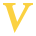

In [54]:
url = "https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D&page_num=0&pd=synthesis"

headers = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': 'https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

response = requests.get(url, headers=headers).text
print(response)

<body class="global-pc"><style>.container_t8KMUu{position:relative}.wrapper_3VSkLk{z-index:99999;position:fixed;left:0;top:0;right:0;background-color:var(--black-10)}
/*# sourceMappingURL=index_container.fbb11b26.css.map*/</style><script class="s-init-data" type="application/json">{"vendorScriptUrl":"//lf3-material.searchpstatp.com/toutiao/feoffline/search-materials-source-pc_search/runtime/dist/browser/js/runtime.4ceebc07.js"}</script><style>.main.show-side-list{width:1144px}.s-result-list{float:left;max-width:588px;width:calc(100% - 48px);margin-left:160px;padding-top:22px;padding-bottom:60px}.s-result-list.pd-video{max-width:788px;width:calc(100% - 24px);min-width:500px}.s-result-list.pd-video .cs-grid{padding-bottom:24px}.s-side-list{float:right;width:276px;min-height:600px;margin-top:28px}@media screen and (min-width:1920px){.hscreen-center .main{max-width:1144px;margin:0 auto}.hscreen-center .main.atlas-container{max-width:none}}@media screen and (max-width:1200px){.main.show-sid
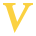

In [56]:
doc = pq(response)
print(doc('body'))

In [57]:
print(doc('.s-result-list'))

<div class="s-result-list"><div class="result-content"><style>.card_17VC-T{margin-top:-22px}
/*# sourceMappingURL=SearchFilter.4d364a13.css.map*/</style><div id="s-dom-ee91acd1"><div data-test-card-id="SearchFilter" data-reactroot=""><div class="cs-view pad-top-6 pad-bottom-6 cs-view-flex align-items-center flex-row card_17VC-T text-s text-default"><div class="cs-view margin-right-12 cs-view-flex align-items-center flex-row cs-text-split text-default text-m"><div class="cs-view cs-view-block cs-text align-items-center cursor-pointer"><div class="flex-1 text-darker text-s text-medium"><span class="text-underline-hover">全网内容</span></div></div><span class="cs-text-split-line margin-left-4 margin-right-4"/><div class="cs-view cs-view-block cs-text align-items-center cursor-pointer"><div class="flex-1 text-default text-s text-regular"><span class="text-underline-hover">头条内容</span></div></div></div><div innerjustify="left" class="cs-view margin-right-6 cs-view-block cs-select-pro radius-m cs

In [61]:
print(type(doc('.s-result-list')('.cs-view.cs-view-block.cs-card-content')))

<class 'pyquery.pyquery.PyQuery'>


In [63]:
print(doc('.s-result-list')('.cs-view.cs-view-block.cs-card-content'))

<div class="cs-view cs-view-block cs-card-content"><div data-log-click="{&quot;pos&quot;:&quot;title&quot;}" class="cs-view pad-bottom-3 cs-view-block cs-text align-items-center cs-header"><div class="flex-1 text-darker text-xl text-medium d-flex align-items-center overflow-hidden"><a data-search="true" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;,&quot;origin_keyword&quot;:&quot;街拍&quot;,&quot;image_keyword&quot;:&quot;街拍&quot;}" target="_self" class="text-ellipsis text-underline-hover"><em>街拍</em> - 图片</a></div></div><div class="cs-view cs-view-block"><div class="cs-view cs-view-block imgs_container_1YEvG3 overflow-hidden radius-m"><div class="cs-view cs-view-flex align-items-center flex-row"><a data-search="true" style="width:166px;height:138px" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_searc

In [73]:
print(doc('.s-result-list > .result-content'))

<div class="result-content"><style>.card_17VC-T{margin-top:-22px}
/*# sourceMappingURL=SearchFilter.4d364a13.css.map*/</style><div id="s-dom-ee91acd1"><div data-test-card-id="SearchFilter" data-reactroot=""><div class="cs-view pad-top-6 pad-bottom-6 cs-view-flex align-items-center flex-row card_17VC-T text-s text-default"><div class="cs-view margin-right-12 cs-view-flex align-items-center flex-row cs-text-split text-default text-m"><div class="cs-view cs-view-block cs-text align-items-center cursor-pointer"><div class="flex-1 text-darker text-s text-medium"><span class="text-underline-hover">全网内容</span></div></div><span class="cs-text-split-line margin-left-4 margin-right-4"/><div class="cs-view cs-view-block cs-text align-items-center cursor-pointer"><div class="flex-1 text-default text-s text-regular"><span class="text-underline-hover">头条内容</span></div></div></div><div innerjustify="left" class="cs-view margin-right-6 cs-view-block cs-select-pro radius-m cs-select-pro-size-m cs-selec

In [75]:
from bs4 import BeautifulSoup

result = doc('.s-result-list > .result-content')
type(result)

pyquery.pyquery.PyQuery

In [78]:
print(str(result))

<div class="result-content"><style>.card_17VC-T{margin-top:-22px}
/*# sourceMappingURL=SearchFilter.4d364a13.css.map*/</style><div id="s-dom-ee91acd1"><div data-test-card-id="SearchFilter" data-reactroot=""><div class="cs-view pad-top-6 pad-bottom-6 cs-view-flex align-items-center flex-row card_17VC-T text-s text-default"><div class="cs-view margin-right-12 cs-view-flex align-items-center flex-row cs-text-split text-default text-m"><div class="cs-view cs-view-block cs-text align-items-center cursor-pointer"><div class="flex-1 text-darker text-s text-medium"><span class="text-underline-hover">全网内容</span></div></div><span class="cs-text-split-line margin-left-4 margin-right-4"/><div class="cs-view cs-view-block cs-text align-items-center cursor-pointer"><div class="flex-1 text-default text-s text-regular"><span class="text-underline-hover">头条内容</span></div></div></div><div innerjustify="left" class="cs-view margin-right-6 cs-view-block cs-select-pro radius-m cs-select-pro-size-m cs-selec

In [80]:
soup = BeautifulSoup(str(result))
print(soup.prettify())

<html>
 <body>
  <div class="result-content">
   <style>
    .card_17VC-T{margin-top:-22px}
/*# sourceMappingURL=SearchFilter.4d364a13.css.map*/
   </style>
   <div id="s-dom-ee91acd1">
    <div data-reactroot="" data-test-card-id="SearchFilter">
     <div class="cs-view pad-top-6 pad-bottom-6 cs-view-flex align-items-center flex-row card_17VC-T text-s text-default">
      <div class="cs-view margin-right-12 cs-view-flex align-items-center flex-row cs-text-split text-default text-m">
       <div class="cs-view cs-view-block cs-text align-items-center cursor-pointer">
        <div class="flex-1 text-darker text-s text-medium">
         <span class="text-underline-hover">
          全网内容
         </span>
        </div>
       </div>
       <span class="cs-text-split-line margin-left-4 margin-right-4">
       </span>
       <div class="cs-view cs-view-block cs-text align-items-center cursor-pointer">
        <div class="flex-1 text-default text-s text-regular">
         <span class="text-u

In [81]:
print(result('a'))

<a data-search="true" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;,&quot;origin_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;,&quot;image_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;}" target="_self" class="text-ellipsis text-underline-hover"><em>街拍</em> - 图片</a><a data-search="true" style="width:166px;height:138px" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;,&quot;origin_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;,&quot;image&quot;:&quot;https://p3-search.byteimg.com/obj/labis/e393dc7583460d181e90c1d4af55bffa&quot;,&quot;image_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;}" target="_blank" class="cs-view cs-view-block cs-image" rel="noopener"><div class="d-block position-relative overflow-hidden cs-image-border cs-image-wrapper"><div class="" 

In [82]:
print(result('a[href]'))

<a data-search="true" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;,&quot;origin_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;,&quot;image_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;}" target="_self" class="text-ellipsis text-underline-hover"><em>街拍</em> - 图片</a><a data-search="true" style="width:166px;height:138px" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;,&quot;origin_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;,&quot;image&quot;:&quot;https://p3-search.byteimg.com/obj/labis/e393dc7583460d181e90c1d4af55bffa&quot;,&quot;image_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;}" target="_blank" class="cs-view cs-view-block cs-image" rel="noopener"><div class="d-block position-relative overflow-hidden cs-image-border cs-image-wrapper"><div class="" 

In [88]:
print(result('a[class="text-ellipsis text-underline-hover"]'))

<a data-search="true" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;,&quot;origin_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;,&quot;image_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;}" target="_self" class="text-ellipsis text-underline-hover"><em>街拍</em> - 图片</a><a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid=undefined&amp;jtoken=" target="_blank" class="text-ellipsis text-underline-hover">香港的<em>街拍</em>太有韵味，熟女风的搭配随处可见，特别显高级</a><a data-search="true" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=information&amp;source=aladdin&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;}" target="_blank" class="text-ellipsis text-underline-hover"><em>街拍</em>-最新资讯</a><a href="https://sou.toutiao.com/search/jump?ur

In [89]:
items = result('a[class="text-ellipsis text-underline-hover"]').items()
for item in items:
    print(item)
    print('------------')

<a data-search="true" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=atlas&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;,&quot;origin_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;,&quot;image_keyword&quot;:&quot;&#x8857;&#x62CD;&quot;}" target="_self" class="text-ellipsis text-underline-hover"><em>街拍</em> - 图片</a>
------------
<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid=undefined&amp;jtoken=" target="_blank" class="text-ellipsis text-underline-hover">香港的<em>街拍</em>太有韵味，熟女风的搭配随处可见，特别显高级</a>
------------
<a data-search="true" href="/search?keyword=%E8%A1%97%E6%8B%8D&amp;pd=information&amp;source=aladdin&amp;dvpf=pc&amp;page_num=0&amp;search_json={&quot;from_search_id&quot;:&quot;20220718124147010150059016252D9479&quot;}" target="_blank" class="text-ellipsis text-underline-hover"><em>街拍</em>-最新资讯</a>
------------
<a hr

In [90]:
items = result('a[class="text-ellipsis text-underline-hover"][href^="https://"]').items()
for item in items:
    print(item)
    print('------------')

<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid=undefined&amp;jtoken=" target="_blank" class="text-ellipsis text-underline-hover">香港的<em>街拍</em>太有韵味，熟女风的搭配随处可见，特别显高级</a>
------------
<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121235645711991311%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid=undefined&amp;jtoken=" target="_blank" class="text-ellipsis text-underline-hover">终于有能看懂的时尚，2022巴黎时装周模特<em>街拍</em>，简约大方好高级</a>
------------
<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121237403091599909%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid=undefined&amp;jtoken=" target="_blank" class="text-ellipsis text-underline-hover">男星<em>街拍</em> | 皮特和朱莉同城隔空联动?是谁跟表姐刘雯撞衫啦</a>
------------
<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121504918351036943%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid

In [95]:
items = result('a[class="text-ellipsis text-underline-hover"][href^="https://"]').items()
for item in items:
    print(item)
    print(type(item.attr['href']))
    print(item.attr['href'])

<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid=undefined&amp;jtoken=" target="_blank" class="text-ellipsis text-underline-hover">香港的<em>街拍</em>太有韵味，熟女风的搭配随处可见，特别显高级</a>
<class 'str'>
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=
<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121235645711991311%2F%3Fchannel%3D%26source%3Dsearch_tab&amp;aid=undefined&amp;jtoken=" target="_blank" class="text-ellipsis text-underline-hover">终于有能看懂的时尚，2022巴黎时装周模特<em>街拍</em>，简约大方好高级</a>
<class 'str'>
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121235645711991311%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=
<a href="https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121237403091599909%2F%3Fchannel%3D%26source

In [96]:
items = result('a[class="text-ellipsis text-underline-hover"][href^="https://"]').items()
for item in items:
    print(item.text())
    print(item.attr('href'))

香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=
终于有能看懂的时尚，2022巴黎时装周模特街拍，简约大方好高级
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121235645711991311%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=
男星街拍 | 皮特和朱莉同城隔空联动?是谁跟表姐刘雯撞衫啦
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121237403091599909%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=
街拍美图|美腿小姐姐们，真的很养眼
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7121504918351036943%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=
街拍:不忘自己的初心，努力提升自己，就能够有所收获
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa6979943668211974670%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=
街拍:漂亮的五官并不是追寻时尚的必要条件
https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa70085322100305

In [100]:
headers2 = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': url,
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}
print(requests.get("https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=", headers=headers2).url)

https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab


In [101]:
print(requests.get("https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab", headers=headers2).text)

<!doctype html><html lang="zh-cn"><head><title>香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级-今日头条</title><meta name="keywords" content="头排看客,服装,服装设计,性感,西装,万能白T恤,高能小子终极装备,连衣裙,香港,高跟鞋"/><meta name="description" content="熟女风真的好迷人，怪不得香港街头随处可见，每套搭配都很美。香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级，本期推荐大家的服装款式，就是那种"/><meta http-equiv="Content-Security-Policy" content="upgrade-insecure-requests"/><link rel="canonical" href="https://www.toutiao.com/article/7115724225666793984/"/><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.toutiao.com/article/7115724225666793984/"/><script type="application/ld+json">{"@context":"https://schema.org","@type":"NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.toutiao.com/article/7115724225666793984/"},"headline":"香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级","description":"熟女风真的好迷人，怪不得香港街头随处可见，每套搭配都很美。香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级，本期推荐大家的服装款式，就是那种","image":["https://p26.toutiaoimg.com/origin/tos-cn-i-qvj2lq49k0/ac5fdbd900334e6ab506307992b68f3b?from=pc","https://p26.to

In [102]:
rr = requests.get("https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=", headers=headers2)
print(rr.url)

https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab


In [103]:
print(rr.status_code)

200


In [104]:
print(rr.history)

[<Response [302]>, <Response [301]>, <Response [301]>]


In [105]:
print(rr.is_redirect)

False


In [106]:
print(requests.get("https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken=", headers=headers2).is_redirect)

False


In [107]:
rr.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n  <meta charset="UTF-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <link rel="shortcut icon" href="//sf3-cdn-tos.douyinstatic.com/obj/eden-cn/uhbfnupkbps/toutiao_favicon.ico" type="image/x-icon">\n  <title>今日头条</title>\n</head>\n<body>\n  <noscript>您需要允许该网站执行 JavaScript</noscript>\n  <script>\n    var startTime = Date.now();\n  </script>\n  <script>\n    (function(i,s,o,g,r,a,m){i["SlardarMonitorObject"]=r;(i[r]=i[r]||function(){(i[r].q=i[r].q||[]).push(arguments)}),(i[r].l=1*new Date());(a=s.createElement(o)),(m=s.getElementsByTagName(o)[0]);a.async=1;a.src=g;a.crossOrigin="anonymous";m.parentNode.insertBefore(a,m);i[r].globalPreCollectError=function(){i[r]("precollect","error",arguments)};if(typeof i.addEventListener==="function"){i.addEventListener("error",i[r].globalPreCollectError,true);i.addEventListener(\'unhandledrejection\', i[r].globalPreColl

In [108]:
rr.history

[<Response [302]>, <Response [301]>, <Response [301]>]

In [109]:
rr.history[0].url

'https://sou.toutiao.com/search/jump?url=http%3A%2F%2Fwww.toutiao.com%2Fa7115724225666793984%2F%3Fchannel%3D%26source%3Dsearch_tab&aid=undefined&jtoken='

In [110]:
rr.history[1].url

'http://www.toutiao.com/a7115724225666793984/?channel=&source=search_tab'

In [111]:
rr.history[2].url

'https://www.toutiao.com/a7115724225666793984/?channel=&source=search_tab'

In [112]:
rr.history[2].text

'Redirecting to <a href="https://www.toutiao.com/article/7115724225666793984/?channel=&amp;source=search_tab">https://www.toutiao.com/article/7115724225666793984/?channel=&amp;source=search_tab</a>.'

In [113]:
rr.history[2].status_code

301

In [114]:
type(rr.history[2].status_code)

int

In [115]:
rr.history[len(rr.history) - 1].status_code

301

In [117]:
if 301 in [301, 302]:
    print("Redirect")

Redirect


In [119]:
rr.history[0].headers

{'Server': 'Tengine', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '181', 'Connection': 'keep-alive', 'Date': 'Mon, 25 Jul 2022 00:56:15 GMT', 'X-Tt-Logid': '2022072508561501021204523517C67ED7', 'Vary': 'Origin', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'Expires': '0', 'Location': 'http://www.toutiao.com/a7115724225666793984/?channel=&source=search_tab', 'X-Agw-Info': 'tHdpfLagJ0LZniN-NzHO-FJ-j3XfmKSa5v29O8TXvq7Vy1ZZN8JGzvTm6qAgUkruySF6rXmdo5eomTIsAboJR4WCrWXy87FMENSwdvd7GDSM6Vjr5zcxQp7upJpbMLXYvFRJgBgzN5XcFtTZWIicek76Rv5KTnl9mwdoBoefNwOPPMU=', 'X-TRANS-LEVEL': '0', 'Server-Timing': 'inner; dur=195, tt_agw; dur=95', 'x-tt-trace-host': '01d4ee2d52e55c550810bb449fc7753a493f9b4e2841f243c39a3dd0aa513b0761de022bf2bc32dc3180ccec427cd92697f59f09cb7f69975e344b48112005b219aec509229dc0e6b6e52fe1bcd4d26cf9', 'x-tt-trace-tag': 'id=3;cdn-cache=miss', 'Via': 'cache38.l2cn1850[238,0], cache10.cn2541[240,0]', 'Ti

In [120]:
rr.history[1].headers

{'Server': 'Tengine', 'Date': 'Mon, 25 Jul 2022 00:56:15 GMT', 'Content-Type': 'text/html', 'Content-Length': '262', 'Connection': 'keep-alive', 'Location': 'https://www.toutiao.com/a7115724225666793984/?channel=&source=search_tab', 'Via': 'cache10.cn2005[,0]', 'Timing-Allow-Origin': '*', 'EagleId': '0ed7379e16587105755008981e'}

In [121]:
rr.history[2].headers

{'Server': 'Tengine', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '197', 'Connection': 'keep-alive', 'Date': 'Mon, 25 Jul 2022 00:56:15 GMT', 'x-tt-logid': '202207250856150101290981331B1417C3', 'Access-Control-Allow-Credentials': 'true', 'Location': 'https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'content-security-policy': 'frame-ancestors *.bytedance.net *.snssdk.com shiqu.cn *.shiqu.cn zhan.vivo.com wukong.vivo.com.cn;report-uri https://i.snssdk.com/log/sentry/v2/api/slardar/main/?ev_type=csp&bid=toutiao_web_pc', 'content-security-policy-report-only': "frame-ancestors *.bytedance.net *.snssdk.com shiqu.cn *.shiqu.cn zhan.vivo.com wukong.vivo.com.cn;default-src 'self' 'unsafe-inline' 'unsafe-eval' data: *.snssdk.com *.toutiaostatic.com *.bdxiguaimg.com *.bytegoofy.com *.bytescm.com *.byted-static.com *.douyinstatic.com *.toutiao

In [122]:
rr.history[2].url

'https://www.toutiao.com/a7115724225666793984/?channel=&source=search_tab'

In [123]:
rr.history[2].headers['Location']

'https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab'

In [124]:
article = requests.get(rr.history[2].headers['Location'], headers=headers2).text
print(article)

<!doctype html><html lang="zh-cn"><head><title>香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级-今日头条</title><meta name="keywords" content="头排看客,服装,服装设计,性感,西装,万能白T恤,高能小子终极装备,连衣裙,香港,高跟鞋"/><meta name="description" content="熟女风真的好迷人，怪不得香港街头随处可见，每套搭配都很美。香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级，本期推荐大家的服装款式，就是那种"/><meta http-equiv="Content-Security-Policy" content="upgrade-insecure-requests"/><link rel="canonical" href="https://www.toutiao.com/article/7115724225666793984/"/><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.toutiao.com/article/7115724225666793984/"/><script type="application/ld+json">{"@context":"https://schema.org","@type":"NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.toutiao.com/article/7115724225666793984/"},"headline":"香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级","description":"熟女风真的好迷人，怪不得香港街头随处可见，每套搭配都很美。香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级，本期推荐大家的服装款式，就是那种","image":["https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/ac5fdbd900334e6ab506307992b68f3b~noop.image?_iz=58558&from=a

In [126]:
items2 = pq(article)('.pgc-img > img').items()
for item in items2:
    print(item.attr('src'))

https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/ac5fdbd900334e6ab506307992b68f3b~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659751748&x-signature=p3eBwfC0v00XIbXKZEIzbnjtCXY%3D
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/e739821143a3463486ee56e8fc0bfd00~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659751748&x-signature=KIw14STmCB2G7XEsiLfyaHr%2FBa4%3D
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/9f93fecd78c843ed971ce05c5f3fbd74~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659751748&x-signature=SEBPV4370HuEDwAoFe791VFKZdQ%3D
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/b25207a11fc34f45b58d3b0e917f1a86~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659751748&x-signature=zw3r7pQrMYNdqM6W79PvLH09ReA%3D
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/21f7b3947f994626bf006dd27a2284c1~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659751748&x-signature=jFmKdaommF6cDzj5Gr7kuGPleFc%3D
https://p3-sign.toutiaoimg.com/tos-cn-

In [127]:
from urllib.parse import urlparse
import os.path


imgurl = "https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/ac5fdbd900334e6ab506307992b68f3b~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659751748&x-signature=p3eBwfC0v00XIbXKZEIzbnjtCXY%3D"
p = os.path.basename(urlparse(imgurl).path).split(sep="~")[0]
print(p)

ac5fdbd900334e6ab506307992b68f3b


In [128]:
imgfile = p + '.jpg'
with open(imgfile, 'wb') as f:
    f.write(requests.get(imgurl, headers=headers2).content)

In [132]:
print(pq(article)('head > title').text())

香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级-今日头条


In [133]:
type(pq(article)('head > title').text())

str

In [134]:
print(pq(article)('head > title').text().split(sep="-")[0])

香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级


In [135]:
import os


os.mkdir(pq(article)('head > title').text().split(sep="-")[0])

In [138]:
from pyquery import PyQuery as pq
from urllib.parse import urlparse
import os
import os.path
import time
import requests


url = "https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D&page_num=0&pd=synthesis"

headers = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': 'https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

headers2 = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': url,
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

response = requests.get(url, headers=headers).text
doc = pq(response)
result = doc('.s-result-list > .result-content')
items = result('a[class="text-ellipsis text-underline-hover"][href^="/search/jump?url=http%3A%2F%2Fwww.toutiao.com"]').items()
for item in items:
    dirname = item.text()
    dirname = dirname.replace(':', '')
    dirname = dirname.replace('|', '')
    dirname = dirname.replace('“', '')
    dirname = dirname.replace('”', '')
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    print(dirname)
    page_url = "https://so.toutiao.com" + item.attr('href')
    page = requests.get(page_url, headers=headers2)
    if page.url != page_url:
        print(page.url)
        article = requests.get(page.url, headers=headers2).text
        images = pq(article)('.pgc-img > img').items()
        print(len(list(images)))
        if len(list(images)) == 0:
            images = pq(article)('article > img').items()
        for img in images:
            imgurl = img.attr('src')
            print(imgurl)
            imgfile = dirname + "/" + os.path.basename(urlparse(imgurl).path).split(sep="~")[0] + '.jpg'
            print(imgfile)
            with open(imgfile, 'wb') as f:
                f.write(requests.get(imgurl, headers=headers2).content)
    time.sleep(1)

香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级
https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab
8
街拍不忘自己的初心，努力提升自己，就能够有所收获
https://www.toutiao.com/article/6979943668211974670/?channel=&source=search_tab
26
看完巴黎素人街拍才明白不扮嫩的打扮，才最高级，人人都是主角
https://www.toutiao.com/article/7126016230179422727/?channel=&source=search_tab
9
马上评被性凝视玩坏的街拍，需要立规矩了
https://www.toutiao.com/article/7125688433007460899/?channel=&source=search_tab
0
https://p3-sign.toutiaoimg.com/tos-cn-i-tjoges91tu/TCxQoZa2LmqLvp~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659848160&x-signature=Kd0N5Iv4u7e6NYTeD3kDxMxAysE%3D
马上评被性凝视玩坏的街拍，需要立规矩了/TCxQoZa2LmqLvp.jpg
被上海街拍惊艳到了，不穿得花里胡哨反而自然高级，真美
https://www.toutiao.com/article/7101228255000527360/?channel=&source=search_tab
19
街拍
https://www.toutiao.com/article/7121163227702051343/?channel=&source=search_tab
10
杭州街拍分享，温柔的女人适合复古风服装，气质还很高级
https://www.toutiao.com/article/7118321864170439172/?channel=&source=search_tab
8


In [139]:
from pyquery import PyQuery as pq
from urllib.parse import urlparse
import os
import os.path
import time
import requests


url = "https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D&page_num=0&pd=synthesis"

headers = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': 'https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

headers2 = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': url,
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

response = requests.get(url, headers=headers).text
doc = pq(response)
result = doc('.s-result-list > .result-content')
items = result('a[class="text-ellipsis text-underline-hover"][href^="/search/jump?url=http%3A%2F%2Fwww.toutiao.com"]').items()
for item in items:
    dirname = item.text()
    dirname = dirname.replace(':', '')
    dirname = dirname.replace('|', '')
    dirname = dirname.replace('“', '')
    dirname = dirname.replace('”', '')
    dirname = dirname.replace('?', '')
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    page_url = "https://so.toutiao.com" + item.attr('href')
    page = requests.get(page_url, headers=headers2)
    if page.url != page_url:
        print(page.url)
        article = requests.get(page.url, headers=headers2).text
        # items() 方法返回的是生成器，生成器只能被调用一次，如果需要多次调用，可以通过 list() 函数将其转换为列表
        images = pq(article).items('.pgc-img > img')
        if len(list(pq(article).items('.pgc-img > img'))) == 0:
            images = pq(article).items('article > img')
        for img in images:
            imgurl = img.attr('src')
            print(imgurl)
            imgfile = dirname + "/" + os.path.basename(urlparse(imgurl).path).split(sep="~")[0] + '.jpg'
            print(imgfile)
            if not os.path.exists(imgfile):
                with open(imgfile, 'wb') as f:
                    f.write(requests.get(imgurl, headers=headers2).content)
            else:
                print("Already Download:", imgfile)
    time.sleep(1)

https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/ac5fdbd900334e6ab506307992b68f3b~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659854803&x-signature=9mqA0gLI9xgZDX8wrPbuonRDhgY%3D
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/ac5fdbd900334e6ab506307992b68f3b.jpg
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/e739821143a3463486ee56e8fc0bfd00~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659854803&x-signature=JNdUfoLy8zgHm27ApBd6p23cr%2F8%3D
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/e739821143a3463486ee56e8fc0bfd00.jpg
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/9f93fecd78c843ed971ce05c5f3fbd74~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659854803&x-signature=aB3Quf%2FHbLQmCFzCKeHSdz5CZzs%3D
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/9f93fecd78c843ed971ce05c5f3fbd74.jpg
https://p3-sign.toutiaoimg.com/tos-cn-i-qvj2lq49k0/b25207a11fc34f45b58d3b0e917f1a86~noop.image?_iz=58558&from=article.pc_detail&x-expires=1659854803

OSError: [WinError 123] 文件名、目录名或卷标语法不正确。: '男星街拍  玄彬新街拍有爸爸味?金姐的小男友都开始拍电影了'

In [140]:
from pyquery import PyQuery as pq
from urllib.parse import urlparse
import os
import os.path
import time
import requests


url = "https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D&page_num=0&pd=synthesis"

headers = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': 'https://so.toutiao.com/search?dvpf=pc&source=input&keyword=%E8%A1%97%E6%8B%8D',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

headers2 = {
    'cookie': '_S_DPR=1; _S_IPAD=0; MONITOR_WEB_ID=7115666978783053319; tt_webid=7115666978783053319; _S_WIN_WH=1030_610; ttwid=1%7CU2NhjByOr-FVpLkJZJzTqU0Dras7Mzm7WEVeZqPnc-s%7C1658052873%7C876ce7aaf73ab38bc2e1139e7f6fc87669f5f686dfcea4e4177a88a88b286265',
    'Referer': url,
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.136 Safari/537.36',
}

response = requests.get(url, headers=headers).text
doc = pq(response)
result = doc('.s-result-list > .result-content')
items = result('a[class="text-ellipsis text-underline-hover"][href^="/search/jump?url=http%3A%2F%2Fwww.toutiao.com"]').items()
for item in items:
    dirname = item.text()
    dirname = dirname.replace(':', '')
    dirname = dirname.replace('|', '')
    dirname = dirname.replace('“', '')
    dirname = dirname.replace('”', '')
    dirname = dirname.replace('?', '')
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    page_url = "https://so.toutiao.com" + item.attr('href')
    page = requests.get(page_url, headers=headers2)
    if page.url != page_url:
        print(page.url)
        article = requests.get(page.url, headers=headers2).text
        # items() 方法返回的是生成器，生成器只能被调用一次，如果需要多次调用，可以通过 list() 函数将其转换为列表
        images = pq(article).items('.pgc-img > img')
        if len(list(pq(article).items('.pgc-img > img'))) == 0:
            images = pq(article).items('article > img')
        for img in images:
            imgurl = img.attr('src')
            imgfile = dirname + "/" + os.path.basename(urlparse(imgurl).path).split(sep="~")[0] + '.jpg'
            print(imgfile)
            if not os.path.exists(imgfile):
                with open(imgfile, 'wb') as f:
                    f.write(requests.get(imgurl, headers=headers2).content)
            else:
                print("Already Download:", imgfile)
    time.sleep(1)

https://www.toutiao.com/article/7115724225666793984/?channel=&source=search_tab
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/ac5fdbd900334e6ab506307992b68f3b.jpg
Already Download: 香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/ac5fdbd900334e6ab506307992b68f3b.jpg
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/e739821143a3463486ee56e8fc0bfd00.jpg
Already Download: 香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/e739821143a3463486ee56e8fc0bfd00.jpg
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/9f93fecd78c843ed971ce05c5f3fbd74.jpg
Already Download: 香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/9f93fecd78c843ed971ce05c5f3fbd74.jpg
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/b25207a11fc34f45b58d3b0e917f1a86.jpg
Already Download: 香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/b25207a11fc34f45b58d3b0e917f1a86.jpg
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/21f7b3947f994626bf006dd27a2284c1.jpg
Already Download: 香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/21f7b3947f994626bf006dd27a2284c1.jpg
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/c6889a79a7944132936da5e7514d9438.jpg
Already Download: 香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/c6889a79a7944132936da5e7514d9438.jpg
香港的街拍太有韵味，熟女风的搭配随处可见，特别显高级/1ef620809c59416ca